# Análise de Acidentes de Trânsito no Brasil (2025)

Este projeto faz parte da disciplina **Introdução à Ciência de Dados** e tem como objetivo analisar dados de acidentes de trânsito ocorridos no Brasil [ao decorrer do tempo]. Utilizando técnicas de análise exploratória de dados, visualização e estatística, buscamos identificar padrões, causas e fatores relacionados aos acidentes, além de propor insights para prevenção e melhoria da segurança viária.

## Objetivos do Projeto

- Explorar e compreender o conjunto de dados de acidentes de trânsito.
- Identificar as principais causas e tipos de acidentes.
- Analisar a distribuição dos acidentes por estado, município, dia da semana e horário.
- Avaliar o impacto dos acidentes em termos de vítimas (mortos, feridos leves e graves).
- Visualizar o evoluçao/regreção dos acidentes no país no decorrer dos anos.
- Visualizar os dados para facilitar a interpretação e comunicação dos resultados.

## Fonte dos Dados

Os dados utilizados neste projeto foram extraídos do sistema DATATRAN, dados disponibilizados pela PRF contendo informações detalhadas sobre cada ocorrência, como local, horário, condições meteorológicas, tipo de pista, número de vítimas, entre outros.

---


# Link para o Dicionário do DATASET
https://drive.google.com/file/d/11zOQvccvoVSImByIp5-E0PxJ2larrEXy/view

# Importações:

---

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


# Informações Pincipais da Tabela:
---

In [ ]:
cols = ['data_inversa',
        'dia_semana',
        'horario',
        'uf',  
        'condicao_meteorologica']

dtypes = {
    'dia_semana': 'category',
    'horarios': 'string',
    'uf': 'category',
    'condicao_meteorologica': 'category',
}

arquivos = sorted(glob.glob('datatran*.csv'))

tabelas = []


for arq in arquivos:
    print(f"Lendo {arq}...")
    df = pd.read_csv(
        arq, 
        sep=';', 
        usecols=cols, 
        dtype=dtypes,
        parse_dates=['data_inversa'],
        dayfirst=True,
        low_memory=False
    )
    tabelas.append(df)


tabela2007_2025 = pd.concat(tabelas, ignore_index=True)

print(f"Total de registros carregados: {len(tabela2007_2025):,}")

Lendo datatran2007.csv...
Lendo datatran2008.csv...
Lendo datatran2009.csv...
Lendo datatran2010.csv...
Lendo datatran2011.csv...
Lendo datatran2012.csv...
Lendo datatran2013.csv...
Lendo datatran2014.csv...


C:\Users\henri\AppData\Local\Temp\ipykernel_68296\4098041852.py:19: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv(


Lendo datatran2015.csv...
Lendo datatran2016.csv...


C:\Users\henri\AppData\Local\Temp\ipykernel_68296\4098041852.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


Lendo datatran2017.csv...
Lendo datatran2018.csv...
Lendo datatran2019.csv...
Lendo datatran2020.csv...
Lendo datatran2021.csv...
Lendo datatran2022.csv...
Lendo datatran2023.csv...
Lendo datatran2024.csv...
Lendo datatran2025.csv...
Total de registros carregados: 2,157,043


In [21]:
tabela2007_2025['dia_semana'] = tabela2007_2025['dia_semana'].str.strip().str.capitalize()

mapeamento = {
    'Sexta-feira': 'Sexta',
    'Segunda-feira': 'Segunda',
    'Terça-feira': 'Terça',
    'Quarta-feira': 'Quarta',
    'Quinta-feira': 'Quinta',
    'Sábado': 'Sábado',
    'Domingo': 'Domingo'
}

tabela2007_2025['dia_semana'] = tabela2007_2025['dia_semana'].replace(mapeamento)


In [22]:
#tabela2007_2025 = tabela2007_2025.drop(columns=['latitude', 'longitude', 'regional', 'delegacia', 'uop'])

display(tabela2007_2025)

,data_inversa,dia_semana,horario,uf,ano,mes,hora
0,2007-06-11,Segunda,15:30:00,MG,2007,Junho,15
1,2007-06-11,Segunda,15:30:00,MG,2007,Junho,15
2,2007-08-13,Segunda,14:25:00,MG,2007,Agosto,14
3,2007-02-12,Segunda,02:10:00,MA,2007,Fevereiro,2
4,2007-11-20,Terça,05:30:00,CE,2007,Novembro,5
...,...,...,...,...,...,...,...
2157038,2025-05-23,Sexta,17:07:00,BA,2025,Maio,17
2157039,2025-06-29,Domingo,08:30:00,SP,2025,Junho,8
2157040,2025-06-05,Quinta,18:25:00,RJ,2025,Junho,18
2157041,2025-05-01,Quinta,19:50:00,SE,2025,Maio,19


In [4]:
print(tabela2007_2025.info())

#tabela2007_2025 = tabela2007_2025.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157043 entries, 0 to 2157042
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   data_inversa  object
 1   dia_semana    object
 2   horario       object
 3   uf            object
dtypes: object(4)
memory usage: 65.8+ MB
None


# Analise Temporal
-----

In [5]:
# Convertendo a data inversa pra datetime
tabela2007_2025['data_inversa'] = pd.to_datetime(tabela2007_2025['data_inversa'],errors='coerce')

meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
         7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# Criando colunas derivadas
tabela2007_2025.loc[:,'ano'] = tabela2007_2025['data_inversa'].dt.year
tabela2007_2025.loc[:,'mes'] = tabela2007_2025['data_inversa'].dt.month
tabela2007_2025.loc[:,'hora'] = pd.to_datetime(tabela2007_2025['horario'], format='%H:%M:%S', errors='coerce').dt.hour

tabela2007_2025['mes'] = tabela2007_2025['mes'].map(meses)

display(tabela2007_2025.head())

,data_inversa,dia_semana,horario,uf,ano,mes,hora
0,2007-06-11,Segunda,15:30:00,MG,2007,Junho,15
1,2007-06-11,Segunda,15:30:00,MG,2007,Junho,15
2,2007-08-13,Segunda,14:25:00,MG,2007,Agosto,14
3,2007-02-12,Segunda,02:10:00,MA,2007,Fevereiro,2
4,2007-11-20,Terça,05:30:00,CE,2007,Novembro,5


In [6]:
tabela2007_2025

,data_inversa,dia_semana,horario,uf,ano,mes,hora
0,2007-06-11,Segunda,15:30:00,MG,2007,Junho,15
1,2007-06-11,Segunda,15:30:00,MG,2007,Junho,15
2,2007-08-13,Segunda,14:25:00,MG,2007,Agosto,14
3,2007-02-12,Segunda,02:10:00,MA,2007,Fevereiro,2
4,2007-11-20,Terça,05:30:00,CE,2007,Novembro,5
...,...,...,...,...,...,...,...
2157038,2025-05-23,sexta-feira,17:07:00,BA,2025,Maio,17
2157039,2025-06-29,domingo,08:30:00,SP,2025,Junho,8
2157040,2025-06-05,quinta-feira,18:25:00,RJ,2025,Junho,18
2157041,2025-05-01,quinta-feira,19:50:00,SE,2025,Maio,19


In [23]:
tabela2007_2025['horario'].unique()

array(['15:30:00', '14:25:00', '02:10:00', ..., '00:20:47', '08:08:30',
       '01:31:40'], dtype=object)

In [24]:
# Acidentes por dia da semana
acidentes_por_dia = tabela2007_2025['dia_semana'].value_counts()

print('Acidentes por dia:')
print(acidentes_por_dia)



Acidentes por dia:
dia_semana
Sexta      346327
Sábado     341278
Domingo    328956
Segunda    296287
Quinta     291999
Quarta     280418
Terça      271778
Name: count, dtype: int64


In [25]:
# Acidentes por hora
acidentes_por_hora = tabela2007_2025['horario'].value_counts().sort_values(ascending=False)

print('\nAcidentes por hora:')
print(acidentes_por_hora)


Acidentes por hora:
horario
18:00:00    33556
19:00:00    33324
18:30:00    32373
17:00:00    29659
16:00:00    29169
            ...  
07:10:15        1
11:21:42        1
19:10:08        1
00:20:47        1
01:31:40        1
Name: count, Length: 1486, dtype: int64


In [26]:
# Acidentes por mês
acidentes_por_mes = tabela2007_2025.groupby('mes').size()

print('\nAcidentes por mês:')
print(acidentes_por_mes)


Acidentes por mês:
mes
Abril        179786
Agosto       171494
Dezembro     201473
Fevereiro    169638
Janeiro      185246
Julho        177876
Junho        178579
Maio         183831
Março        183442
Novembro     173199
Outubro      179738
Setembro     172741
dtype: int64


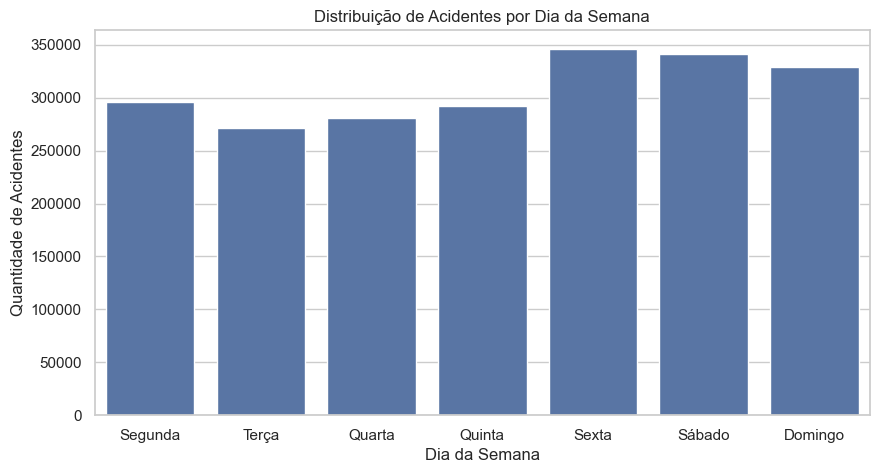

In [29]:
sns.set_theme(style="whitegrid")


# Acidentes por Dia da Semana
plt.figure(figsize=(10,5))
sns.countplot(data=tabela2007_2025, x='dia_semana', order=['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
plt.title('Distribuição de Acidentes por Dia da Semana')
plt.ylabel('Quantidade de Acidentes')
plt.xlabel('Dia da Semana')
plt.show()

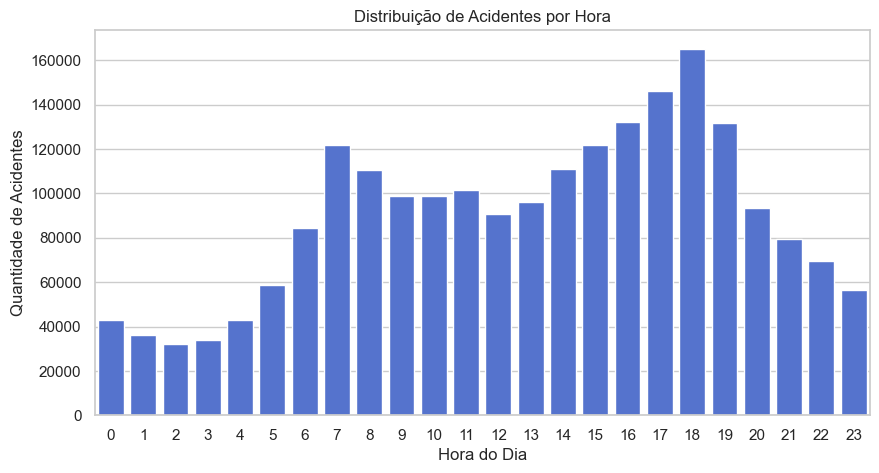

In [30]:
# Acidentes por hora do dia
plt.figure(figsize=(10,5))
sns.countplot(data=tabela2007_2025, x='hora', color='royalblue')
plt.title('Distribuição de Acidentes por Hora')
plt.ylabel('Quantidade de Acidentes')
plt.xlabel('Hora do Dia')
plt.show()

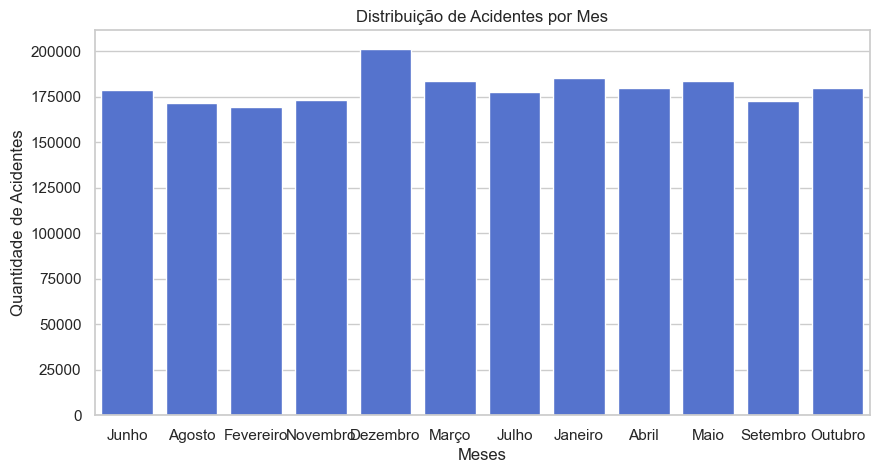

In [31]:
# Acidentes por mes
plt.figure(figsize=(10,5))
sns.countplot(data=tabela2007_2025, x='mes', color='royalblue')
plt.title('Distribuição de Acidentes por Mes')
plt.ylabel('Quantidade de Acidentes')
plt.xlabel('Meses')
plt.show()

In [18]:
tabela2007_2025['mes'].value_counts()

mes
Dezembro     201473
Janeiro      185246
Maio         183831
Março        183442
Abril        179786
Outubro      179738
Junho        178579
Julho        177876
Novembro     173199
Setembro     172741
Agosto       171494
Fevereiro    169638
Name: count, dtype: int64

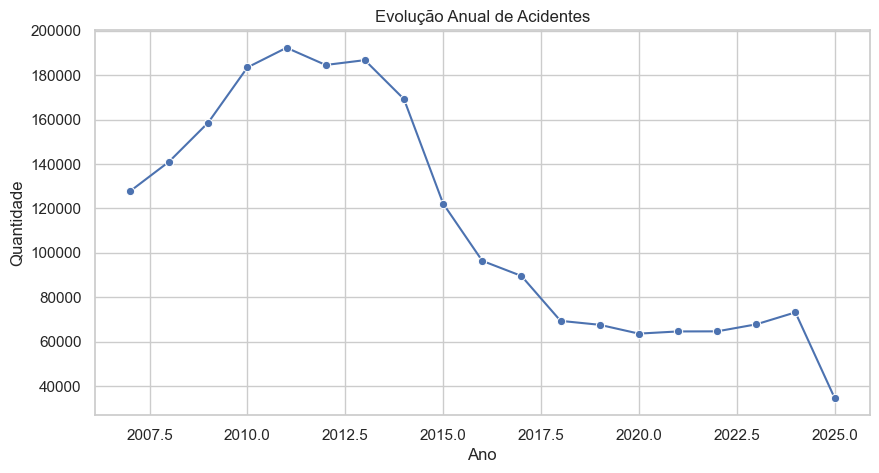

In [15]:
# Evolução ao longo dos anos (linha)
evolucao = tabela2007_2025.groupby('ano').size().reset_index(name='acidentes')
plt.figure(figsize=(10,5))
sns.lineplot(data=evolucao, x='ano', y='acidentes', marker='o')
plt.title('Evolução Anual de Acidentes')
plt.ylabel('Quantidade')
plt.xlabel('Ano')
plt.show()

In [33]:
fds = tabela2007_2025[tabela2007_2025['dia_semana'].isin(['Sábado', 'Domingo'])]

fds['ano'] = fds['data_inversa'].dt.year

contagem_fds = fds.groupby('ano').size().reset_index(name='quantidade_acidentes')

display(contagem_fds)

C:\Users\henri\AppData\Local\Temp\ipykernel_68296\4254587609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fds['ano'] = fds['data_inversa'].dt.year


,ano,quantidade_acidentes
0,2007,40767
1,2008,43010
2,2009,47373
3,2010,54938
4,2011,58689
5,2012,55105
6,2013,54527
7,2014,50049
8,2015,37661
9,2016,31823


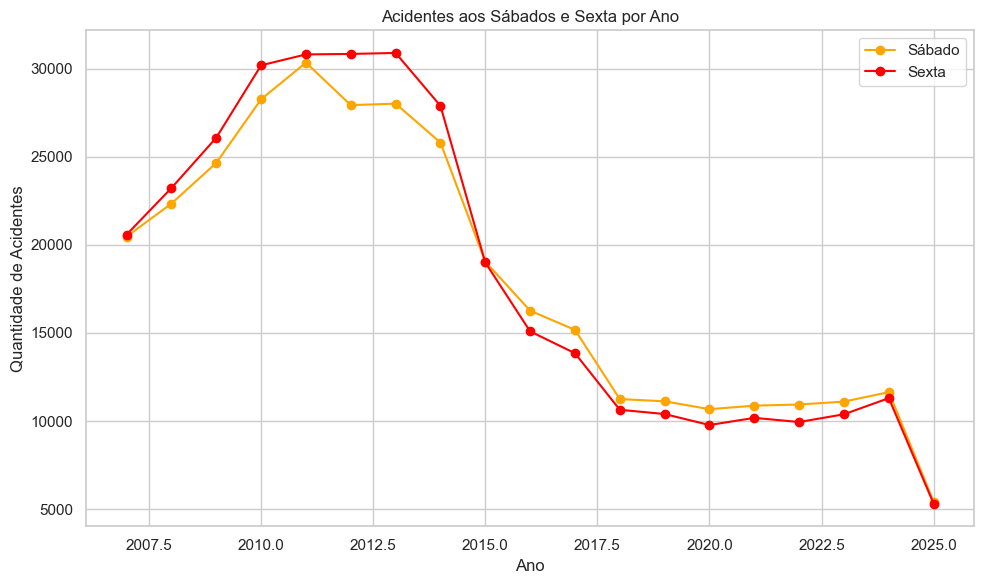

In [41]:
import matplotlib.pyplot as plt

# Garantir que data_inversa é datetime
tabela2007_2025['data_inversa'] = pd.to_datetime(tabela2007_2025['data_inversa'], dayfirst=True)

# Criar coluna com ano
tabela2007_2025['ano'] = tabela2007_2025['data_inversa'].dt.year

# Filtrar apenas sábado e domingo
filtro = tabela2007_2025['dia_semana'].isin(['Sábado', 'Sexta'])
df_fds = tabela2007_2025[filtro]

# Contagem por ano e dia da semana
contagem = df_fds.groupby(['ano', 'dia_semana']).size().unstack(fill_value=0)

# Criar gráfico
plt.figure(figsize=(10, 6))
plt.plot(contagem.index, contagem['Sábado'], marker='o', label='Sábado', color='orange')
plt.plot(contagem.index, contagem['Sexta'], marker='o', label='Sexta', color='red')

plt.title('Acidentes aos Sábados e Sexta por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Acidentes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


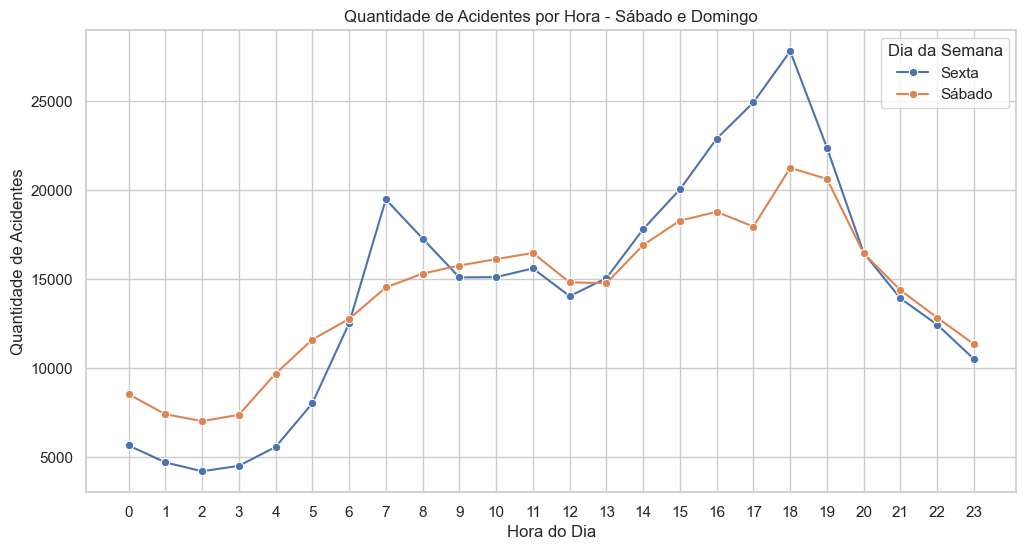

In [44]:
filtro_fim_de_semana = tabela2007_2025['dia_semana'].isin(['Sábado', 'Sexta'])

dados_fds = tabela2007_2025[filtro_fim_de_semana]

agrupado = dados_fds.groupby(['hora', 'dia_semana']).size().reset_index(name='quantidade')

plt.figure(figsize=(12,6))
sns.lineplot(data=agrupado, x='hora', y='quantidade', hue='dia_semana', marker='o')

plt.title('Quantidade de Acidentes por Hora - Sábado e Domingo')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(range(0,24))  # Mostrar todas as horas de 0 a 23
plt.legend(title='Dia da Semana')
plt.grid(True)
plt.show()

## Primeira Conclusão da Análise Temporal
Percebemos que sexta-feira e sábado à noite, entre às 15 e 18 horas, são os dias e horários mais propícios de acontecerem acidentes. Porém, na sexta-feira, ao entardecer, há um pico evidente comparado ao sábado.

Uma possível medida para previnir tais ocorrências é a fiscalização rodoviária aos finais de semanas, principalmente na sexta-feira

---

# Analise Geografica
---

In [ ]:
# Locais de Principais Ocorrências de Acidentes
# Acidentes por UF (estado)
print(tabela2007_2025['uf'].value_counts())

# Acidentes por município
print(tabela2007_2025['municipio'].value_counts())

uf
MG        306550
SC        237263
PR        223709
RJ        183334
RS        166338
SP        157636
BA        118440
GO         97876
ES         88637
PE         86987
MT         58261
PB         47944
CE         45478
RN         44947
MS         44605
PA         42009
RO         41069
PI         34819
MA         34684
AL         23744
DF         21216
SE         18286
TO         15383
AC          6444
RR          4931
AP          3429
AM          3012
(null)        12
Name: count, dtype: int64
municipio
CURITIBA           28925
SAO JOSE           24560
GUARULHOS          22846
DUQUE DE CAXIAS    21544
BETIM              21231
                   ...  
UBIRAJARA              1
JUNDIA                 1
MARIO CAMPOS           1
OLINDA                 1
IACU                   1
Name: count, Length: 2374, dtype: int64


## Conclusões Análise Geografica:
Estados de Minas Gerais, Santa Catarina, Paraná, Rio de Janeiro e Rio Grande do Sul são os estados mais abundantes em acidentes de trânsito. A gente pode restringir a pesquisa para esses 5 estados.

---

# Gravidade e Vítimas 
---

In [ ]:
# Classificação dos acidentes
print(tabela2007_2025['classificacao_acidente'].value_counts())
pd.set_option('display.max_rows', None)


# Mortos e feridos leves por tipo de acidente
resultado = tabela2007_2025.groupby('causa_acidente')[['mortos', 'feridos_leves']].sum()
resultado['total'] = resultado['mortos'] + resultado['feridos_leves']
resultado_ordenado = resultado.sort_values('total', ascending=False)

print(resultado_ordenado)


classificacao_acidente
Sem Vítimas            1027733
Com Vítimas Feridas    1014043
Com Vítimas Fatais      103571
Ignorado                 11660
(null)                      25
Name: count, dtype: int64
                                                    mortos  feridos_leves  \
causa_acidente                                                              
Outras                                               32070         203279   
Falta de atenção                                     15073         204146   
Falta de Atenção à Condução                           5729          91405   
Velocidade incompatível                               8885          74527   
Não guardar distância de segurança                    1263          50489   
Velocidade Incompatível                               5480          44304   
Ingestão de álcool                                    3725          37895   
Desobediência à sinalização                           3410          36656   
Reação tardia ou ineficien

In [ ]:
# Total de mortos e feridos em acidentes com álcool
print(tabela2007_2025['mortos'].value_counts())
print(f'Total: {0}',tabela2007_2025['mortos'].value_counts(ascending=False).sum())

mortos
0     2053471
1       89664
2        9992
3        2325
4         911
5         390
6         122
7          63
9          27
8          25
11         15
10         13
14          5
13          5
15          4
12          4
33          1
26          1
17          1
21          1
19          1
23          1
37          1
Name: count, dtype: int64
Total: 0 2157043
